In [1]:
infrastructures = {
  'education': [
    {
      'ru_name': 'Детские сады',
      'name':'kindergarten',
      'tags': {'amenity':'kindergarten'}
    }, 
    {

      'name':'school',
      'tags':{'amenity':'school'}
    },
    {
      'name':'university',
      'tags':{'amenity':'university'}
    }
  ],
  'healthcare': [
    {
      'name':'polyclinic',
      'tags':{'amenity':'clinic'}
    }, 
    {
      'name':'pharmacy',
      'tags':{'amenity':'pharmacy'}
    }, 
    {
      'name':'hospital',
      'tags':{'amenity':'hospital'}
    }
  ],
  'leisure': [
    # {
    #   'name':'circus',
    #   'tags':{'theatre:genre':'circus'}
    # },
    {
      'name':'zoo',
      'tags':{'tourism':'zoo'}
    },
    {
      'name':'cinema',
      'tags':{'amenity':'cinema'}
    },
    {
      'name':'mall',
      'tags':{'shop':'mall'}
    },
  ],
  'culture': [
    {
      'name':'museum', 
      'tags':{'tourism':'museum'}
    }, 
    {
      'name':'theatre', 
      'tags':{'amenity':'theatre'}
    }
  ],
  'sport': [
    {
      'name':'pitch',
      'tags':{'leisure':'pitch'}
    },
    {
      'name':'swimming_pool',
      'tags':{'leisure':'swimming_pool'}
    }
  ],
  'tourism': [
    {
      'name':'hotel',
      'tags':{'tourism':'hotel'}
    },
    {
      'name':'hostel',
      'tags':{'tourism':'hostel'}
    }
  ],
}

In [2]:
import pandas as pd
import geopandas as gpd

towns = gpd.read_parquet('data/_towns.parquet')
okrugs = gpd.read_parquet('data/_okrugs.parquet')
rayons = gpd.read_parquet('data/_rayons.parquet')
adj_mx = pd.read_pickle('data/_adj_mx.pickle')

In [3]:
from townsnet.models.region import Region

region = Region(
  towns=towns,
  okrugs=okrugs, 
  rayons=rayons, 
  adjacency_matrix=adj_mx
)

In [4]:
for infrastructure, service_types in infrastructures.items():
  for st_dict in service_types:
    service_type_name = st_dict['name']
    gdf = gpd.read_parquet(f'data/_services_{service_type_name}.parquet')
    region.update_capacities(service_type_name, gdf)

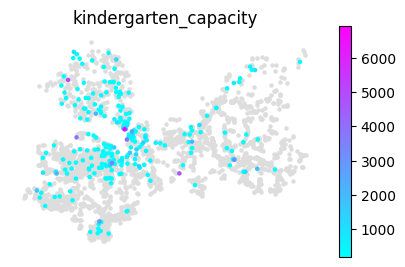

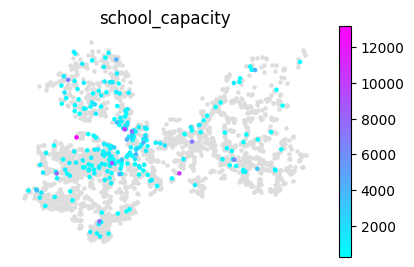

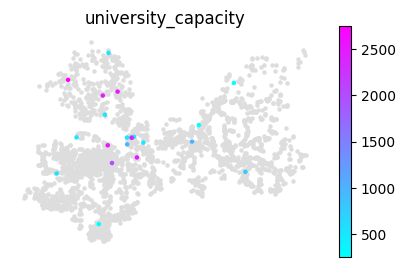

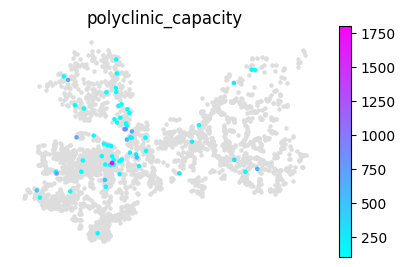

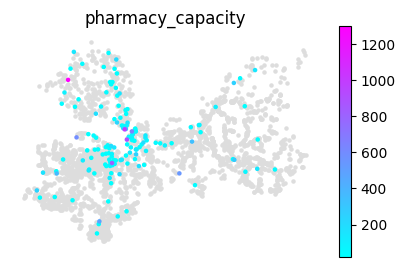

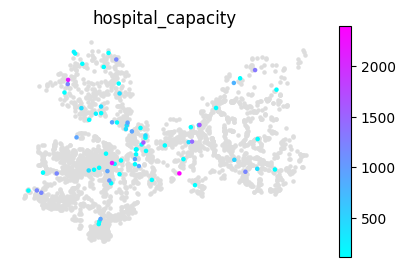

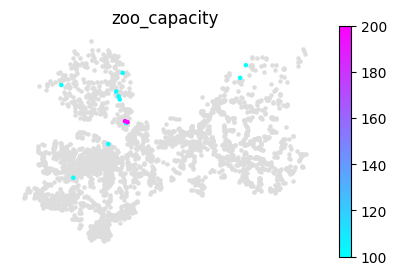

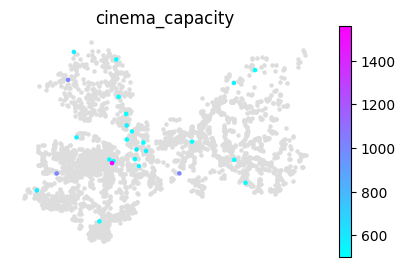

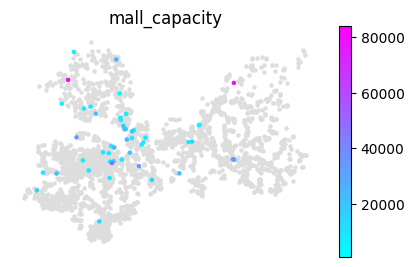

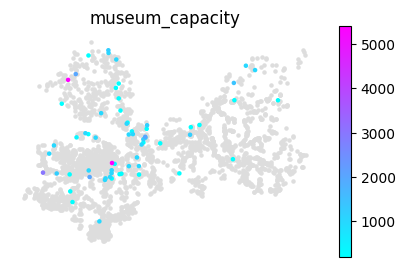

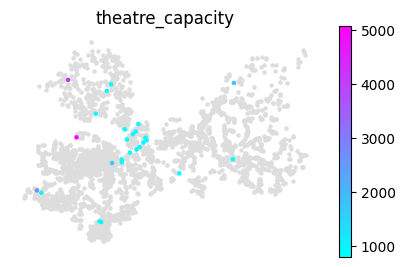

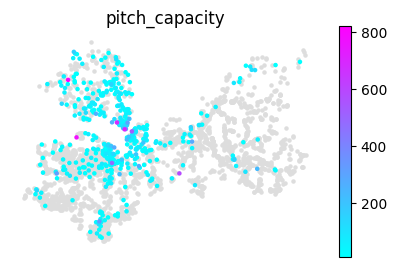

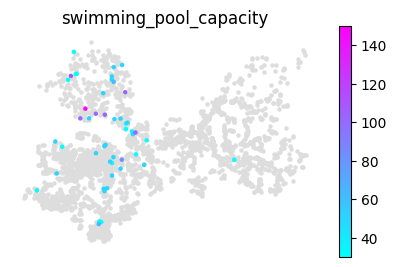

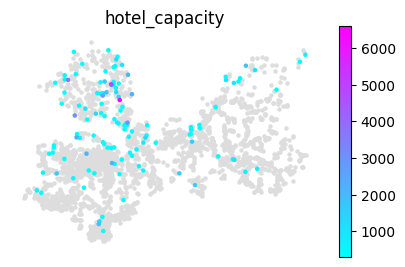

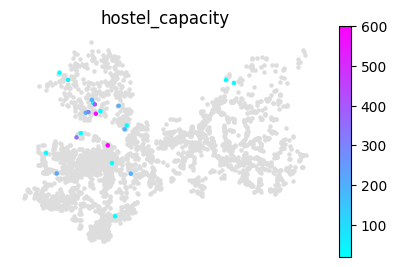

In [5]:
region_gdf = region.to_gdf()
columns = filter(lambda x : x.find('_capacity')>=0,region_gdf.columns)
for column_name in columns:
  ax = region_gdf.loc[region_gdf[column_name]>0].sort_values(by=column_name).plot(
    column=column_name, 
    cmap='cool', 
    legend=True,
    markersize=5,
    figsize=(5,3)
  )
  region_gdf.loc[region_gdf[column_name]==0].plot(color='#ddd', zorder=0, ax=ax, markersize=5)
  ax.set_axis_off()
  ax.set_title(column_name)

In [6]:
from townsnet.method.provision import Provision, ProvisionMethod

prov = Provision(region=region)
prov_dict = {}

for infrastructure, service_types in infrastructures.items():
  for st_dict in service_types:
    service_type_name = st_dict['name']
    prov_dict[service_type_name] = prov.calculate(service_type_name, method=ProvisionMethod.GRAVITATIONAL)

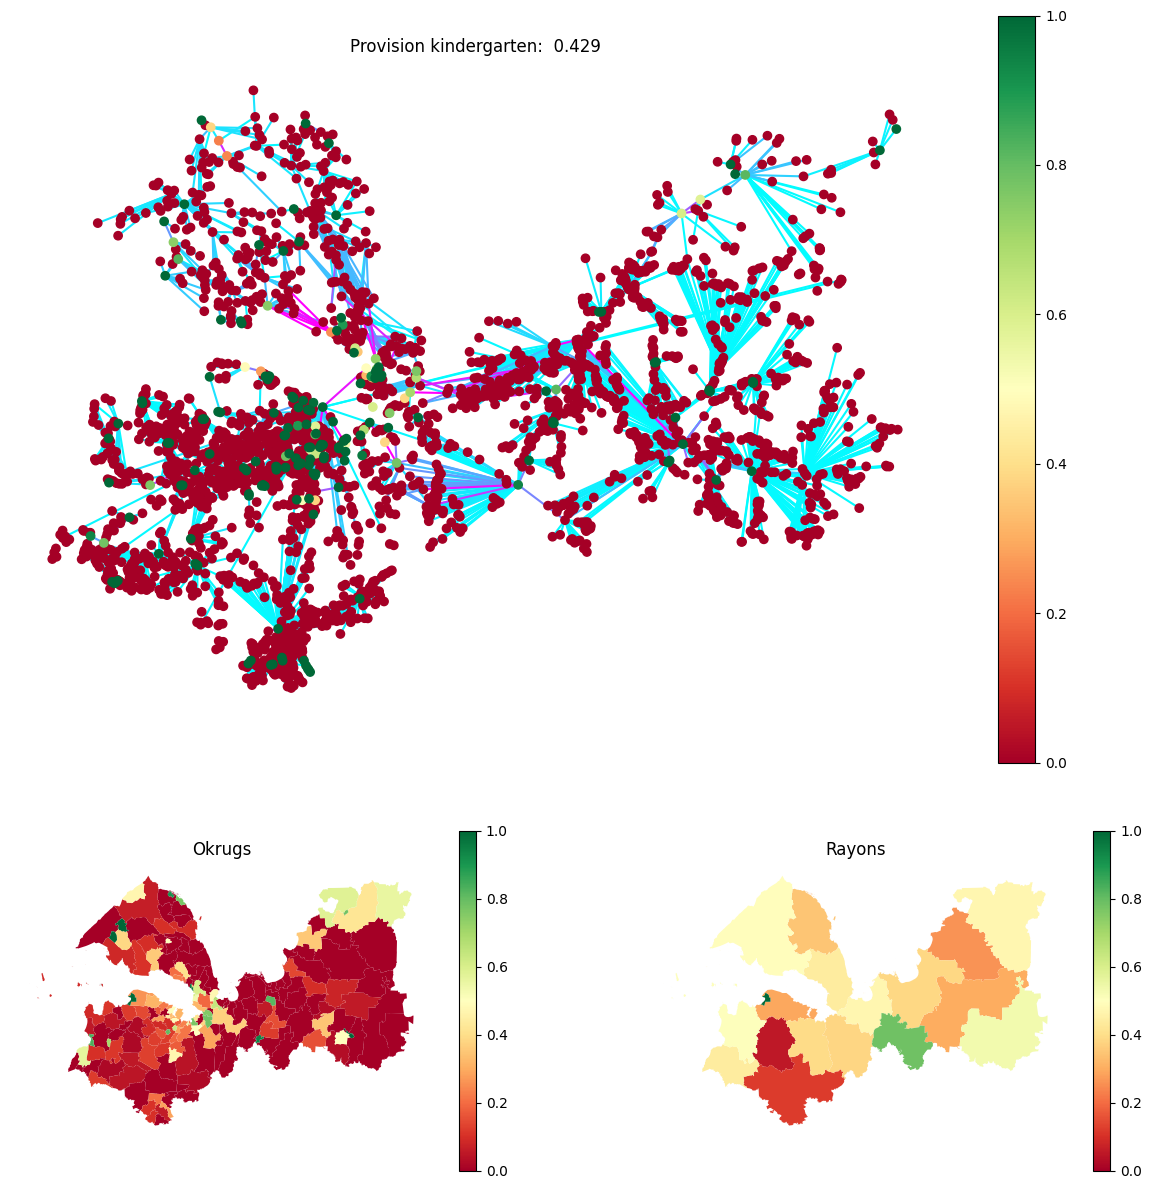

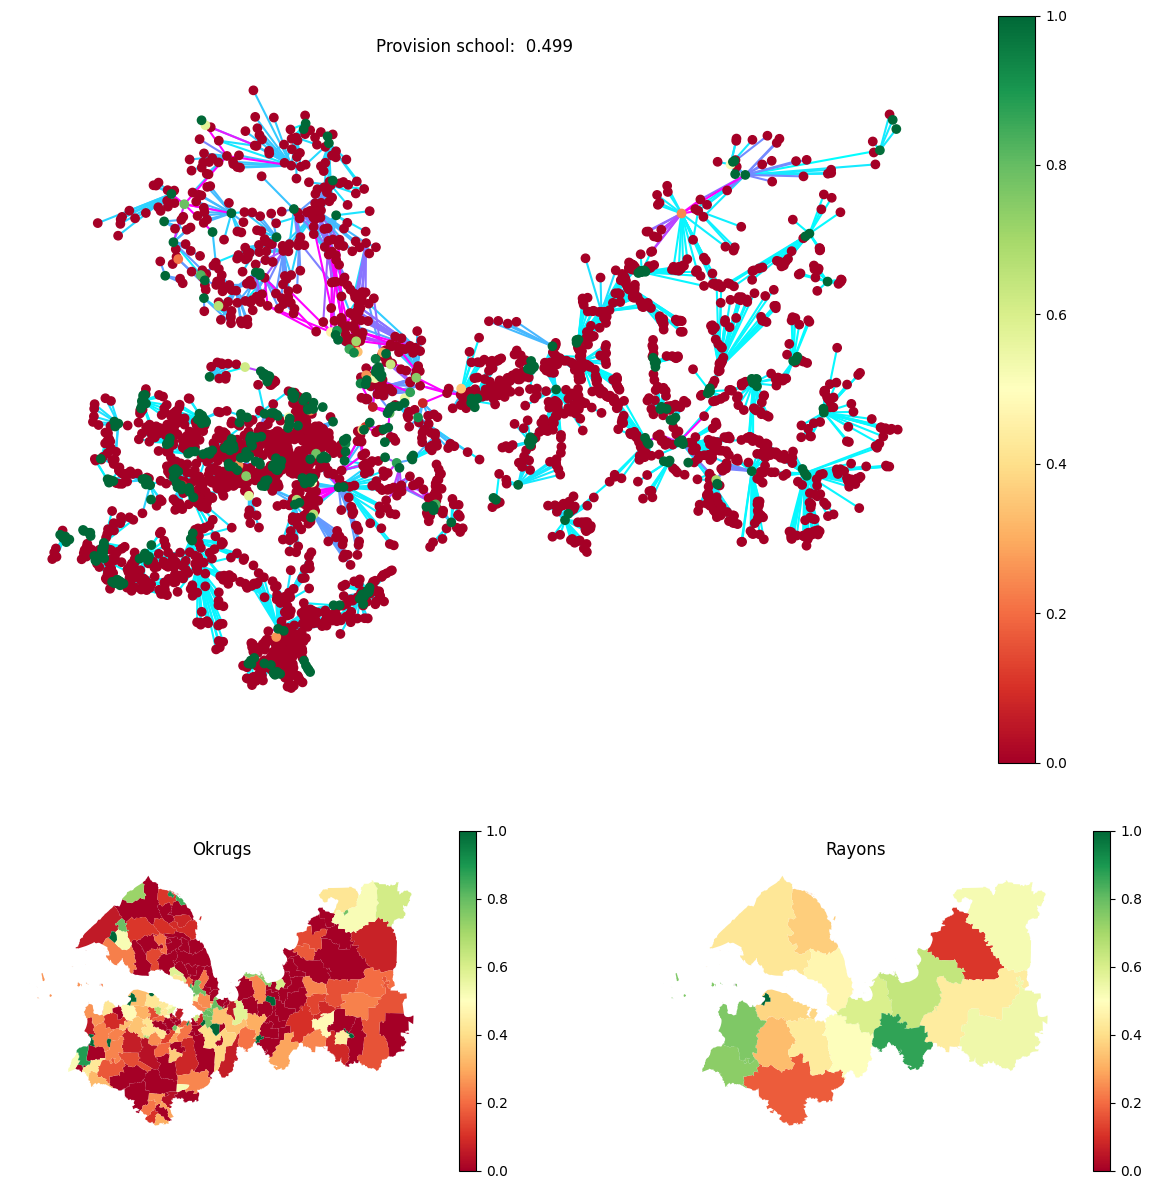

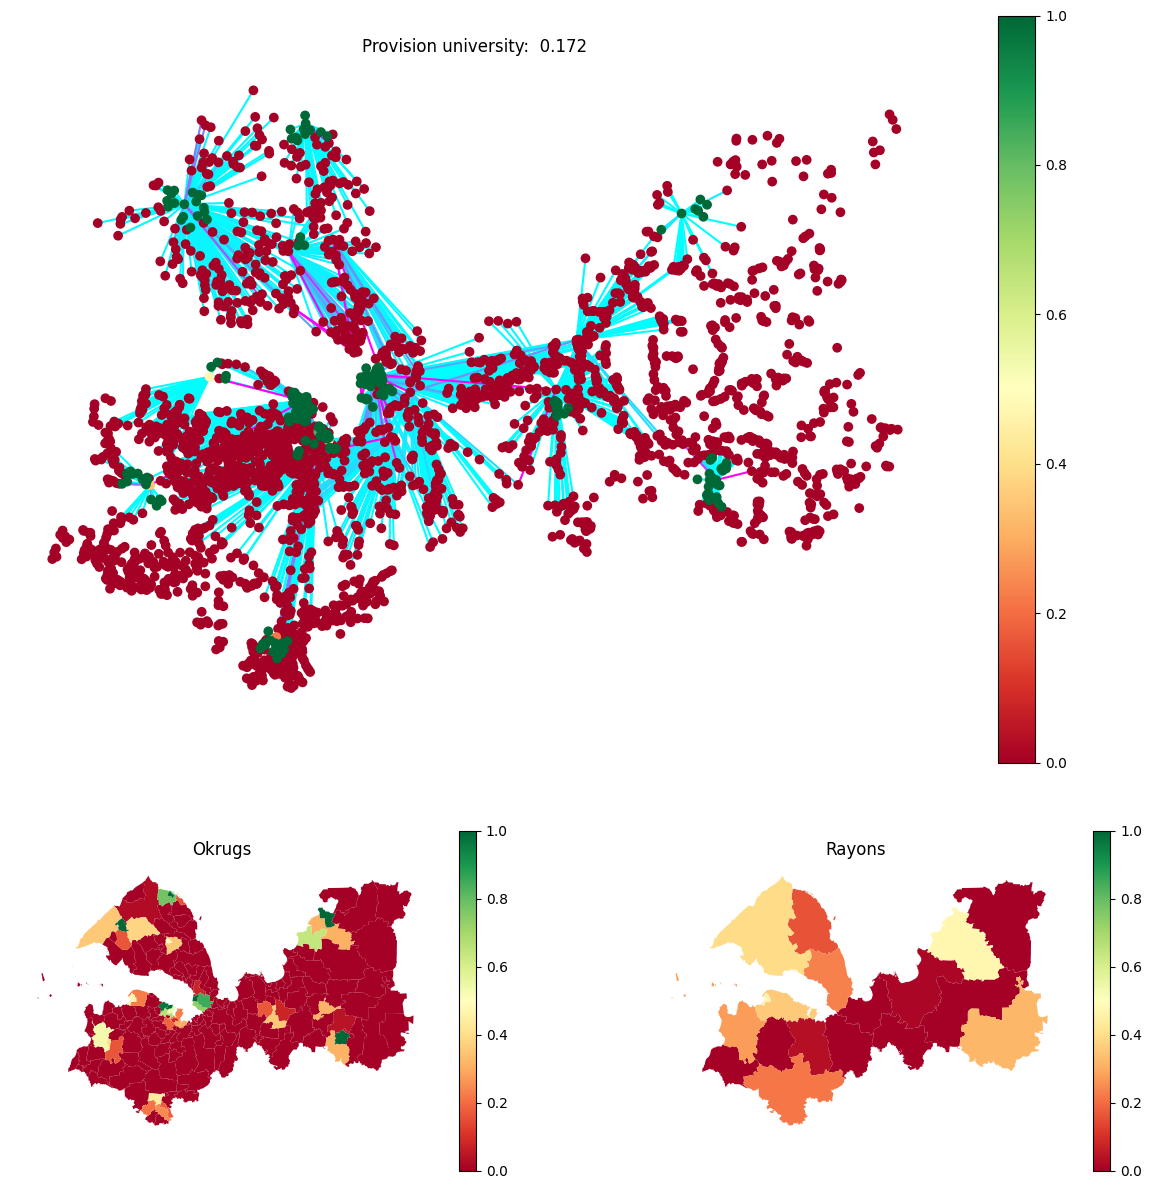

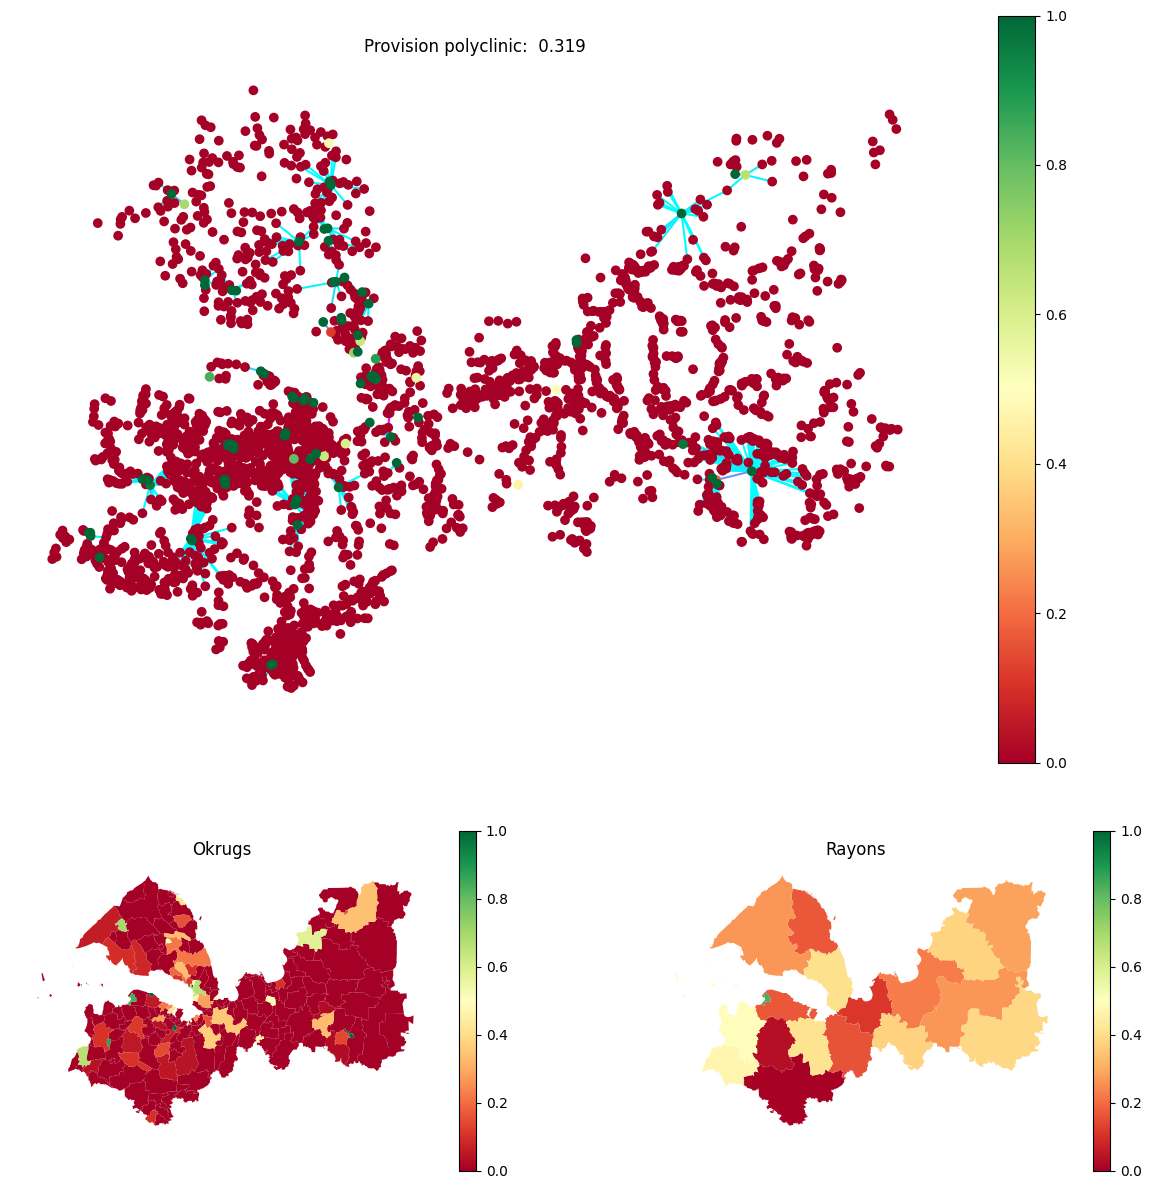

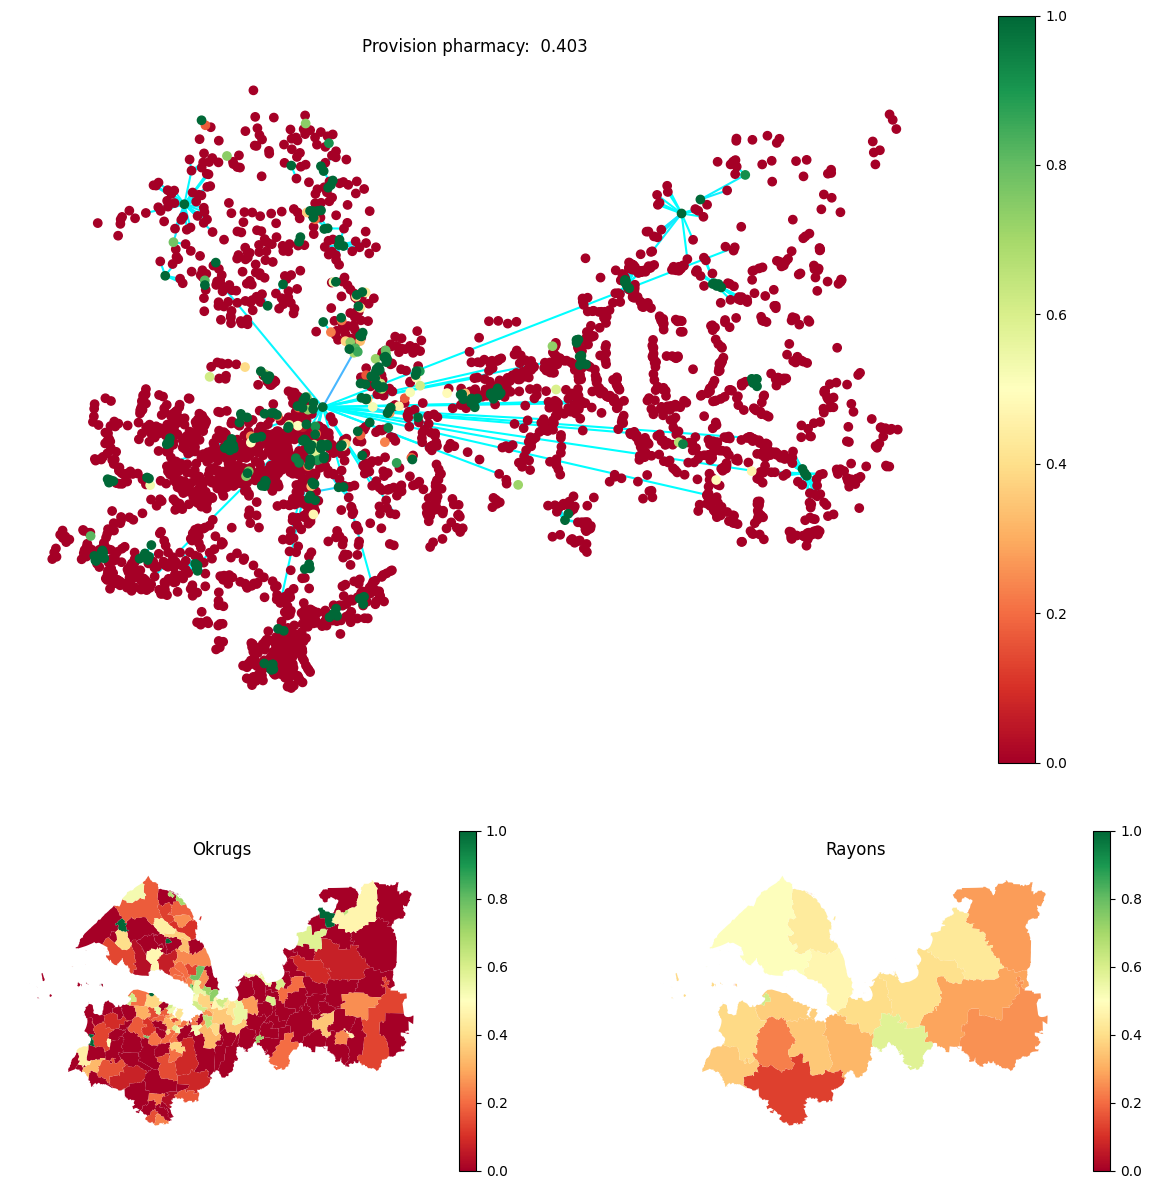

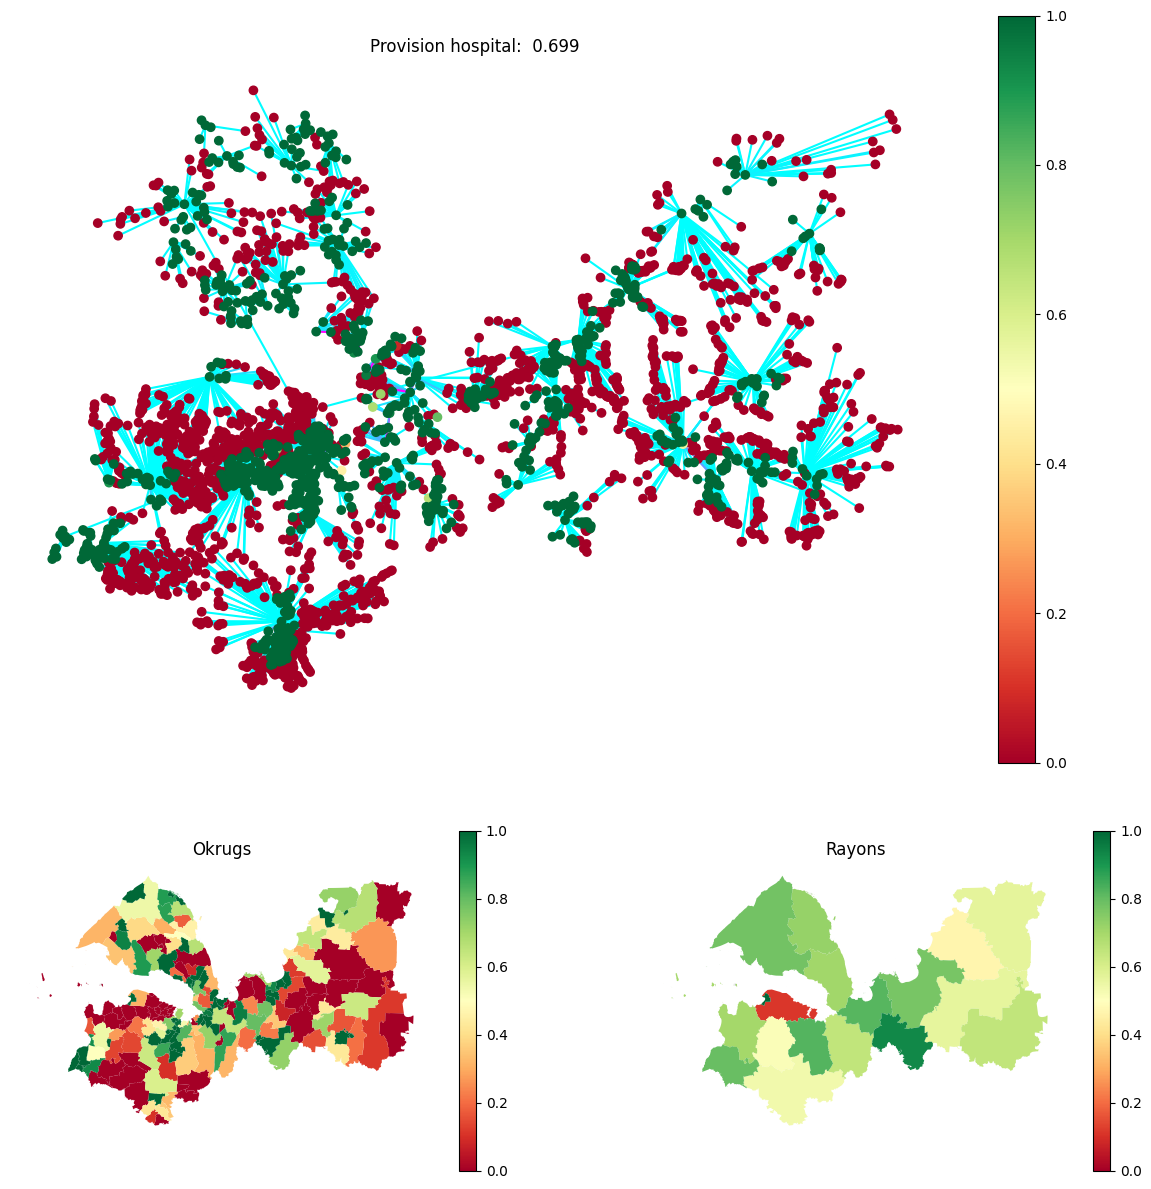

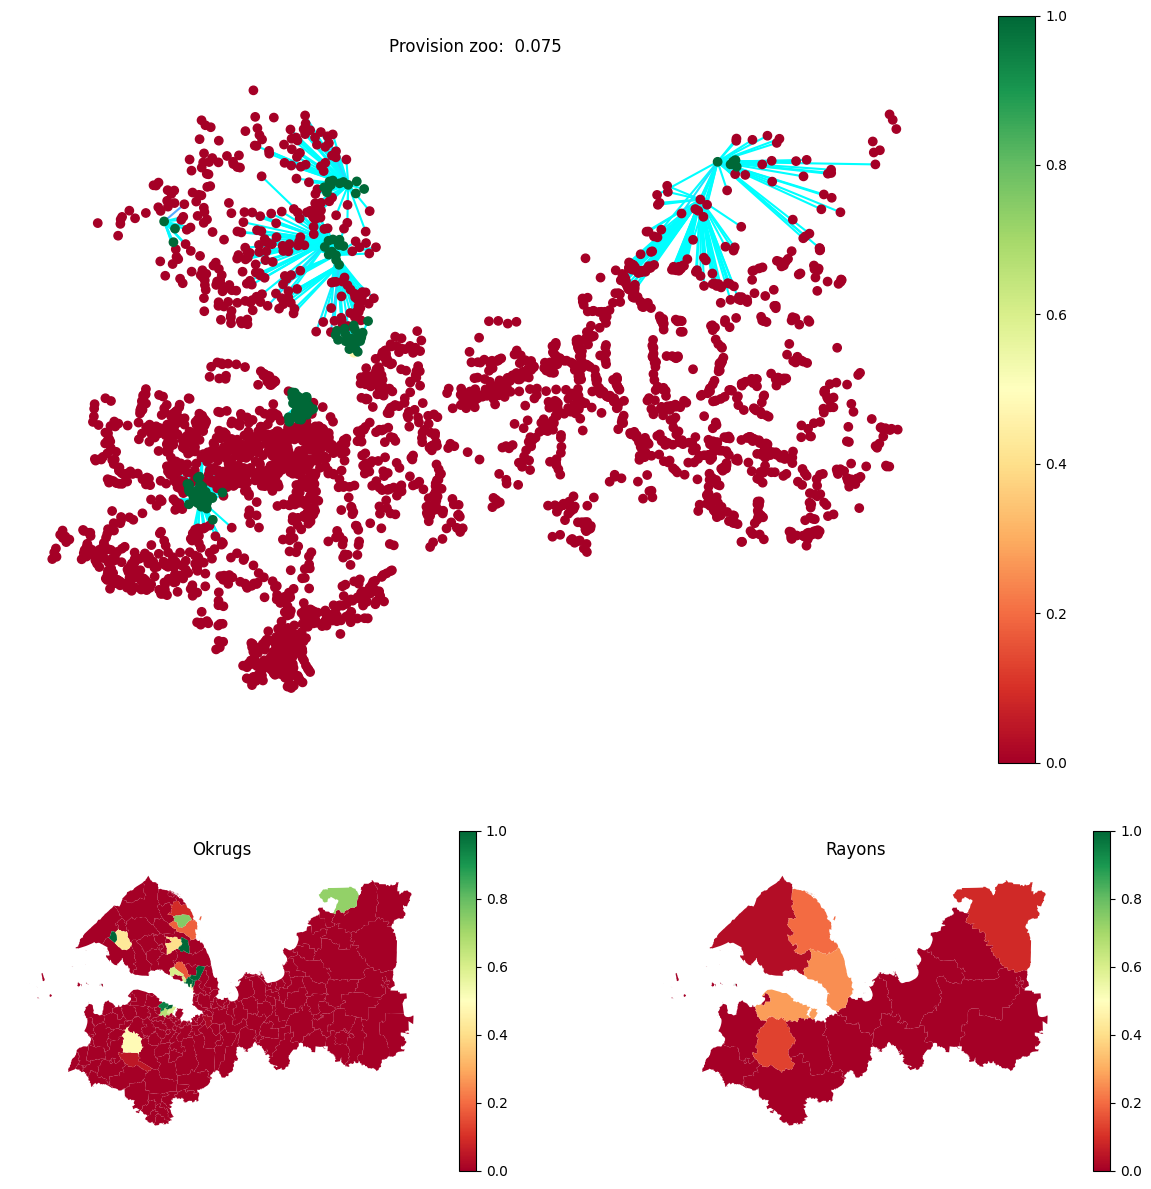

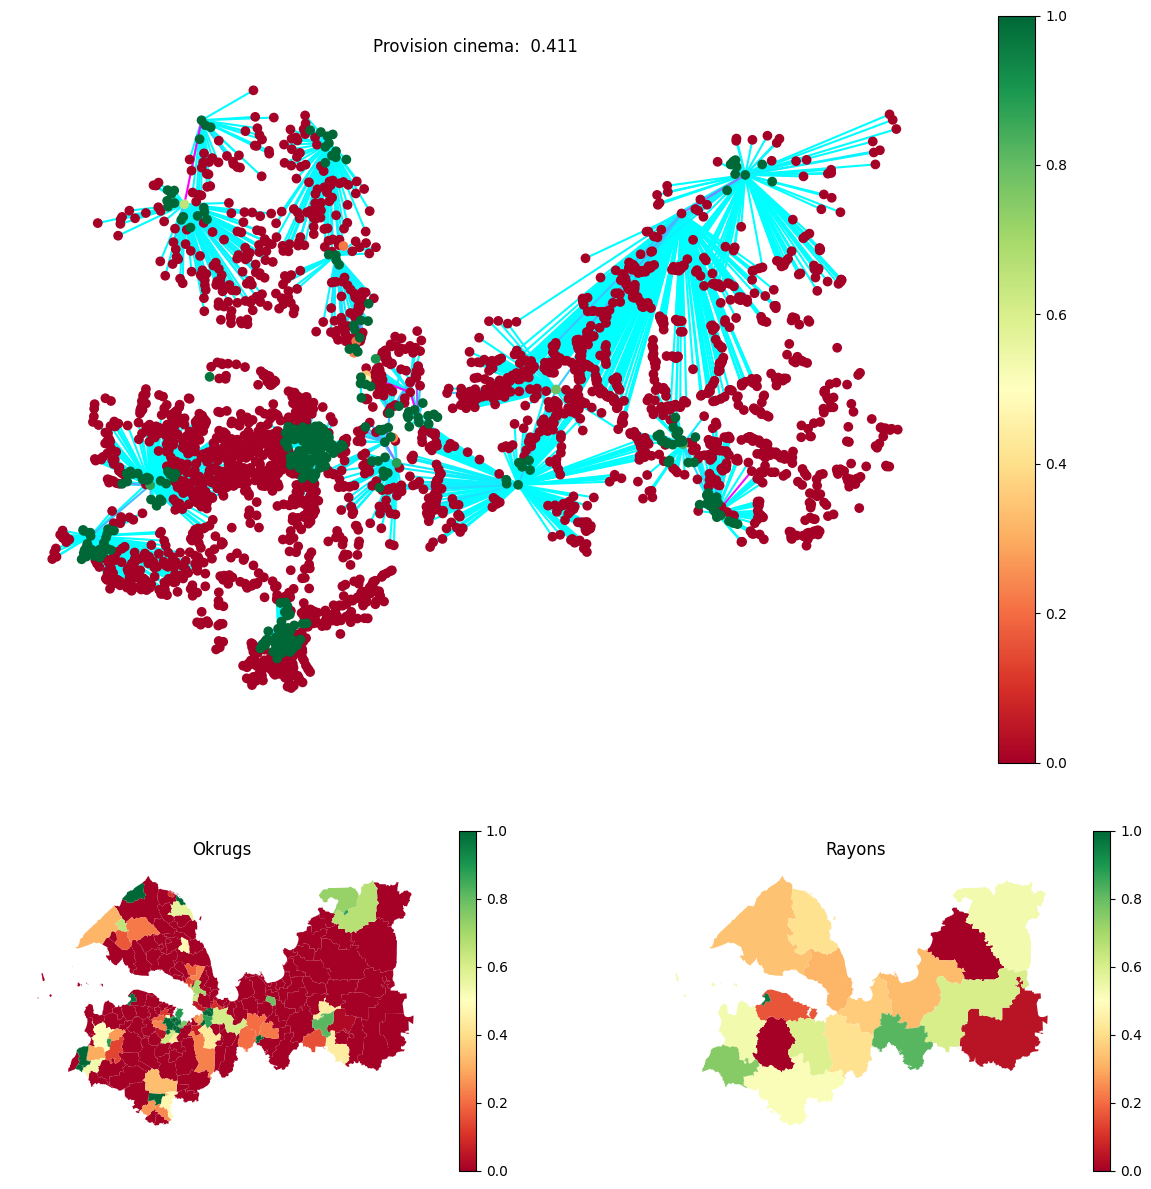

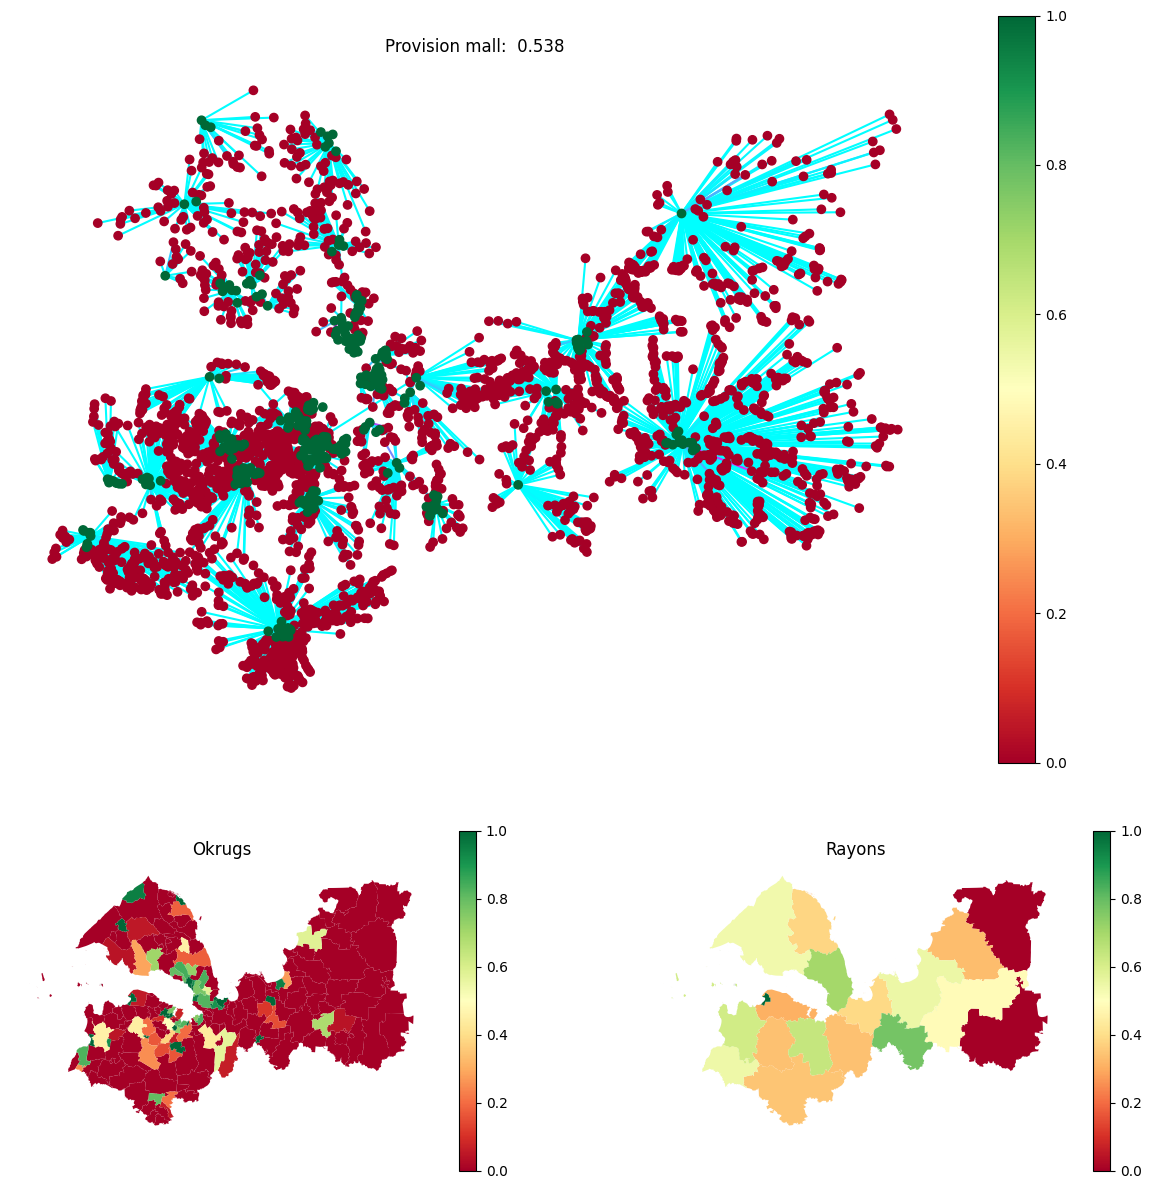

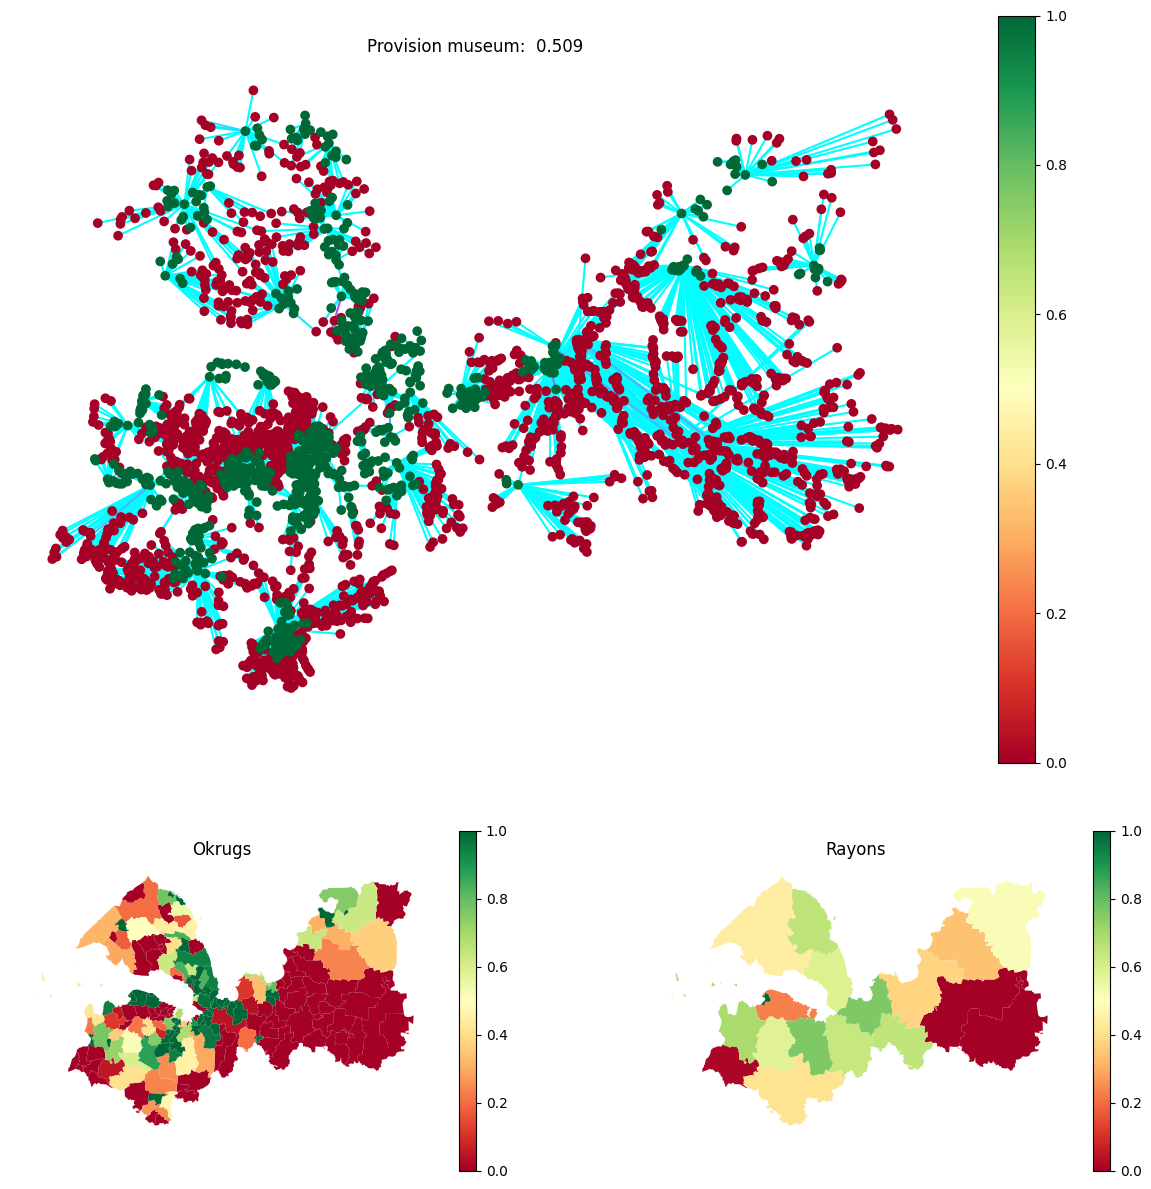

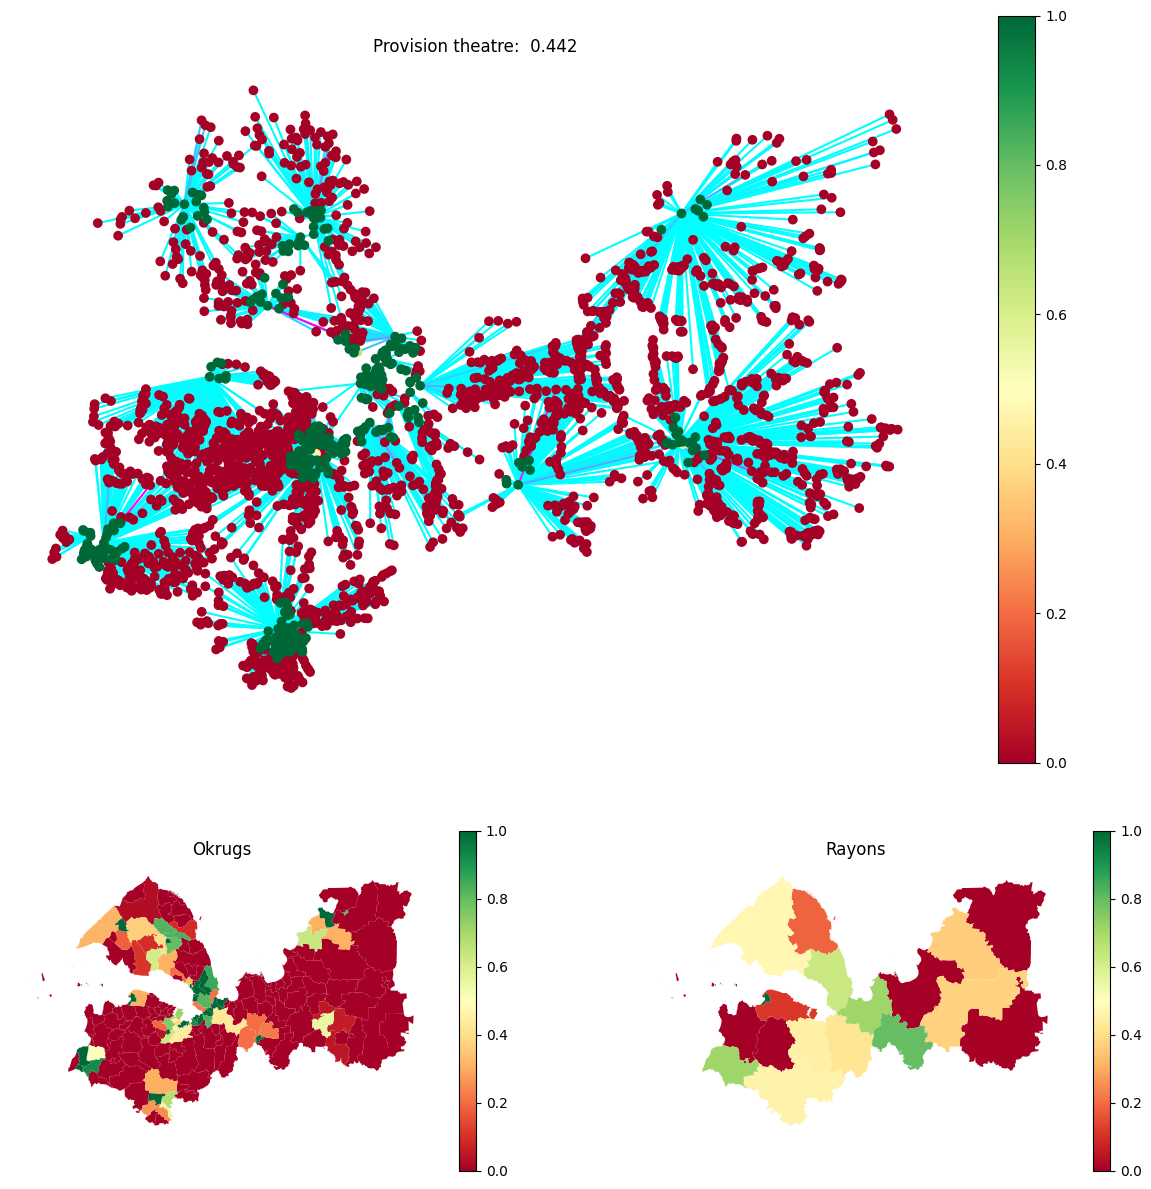

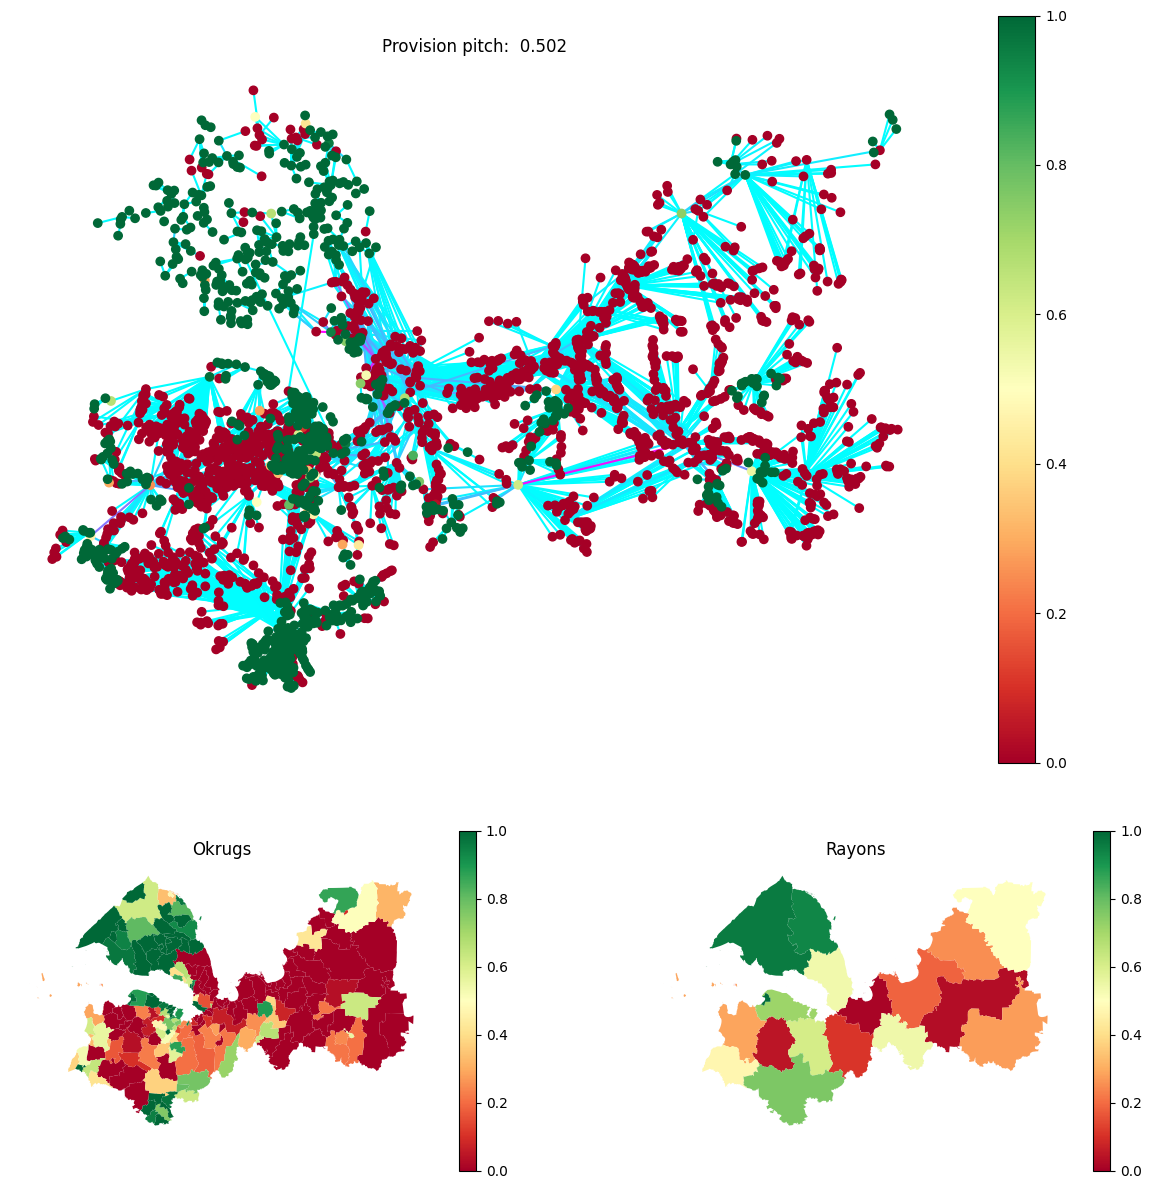

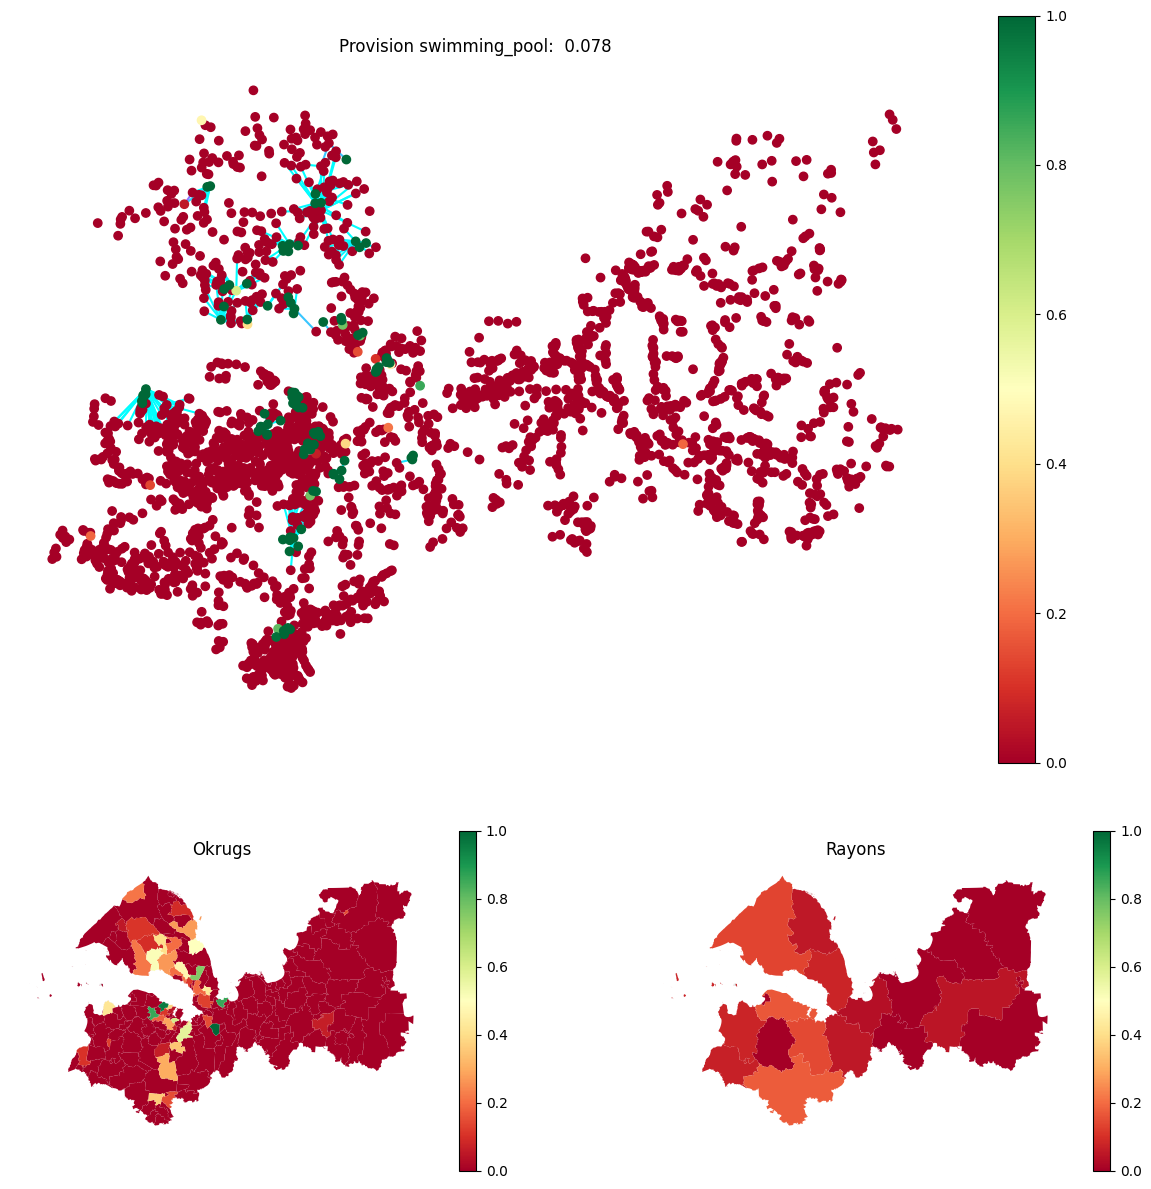

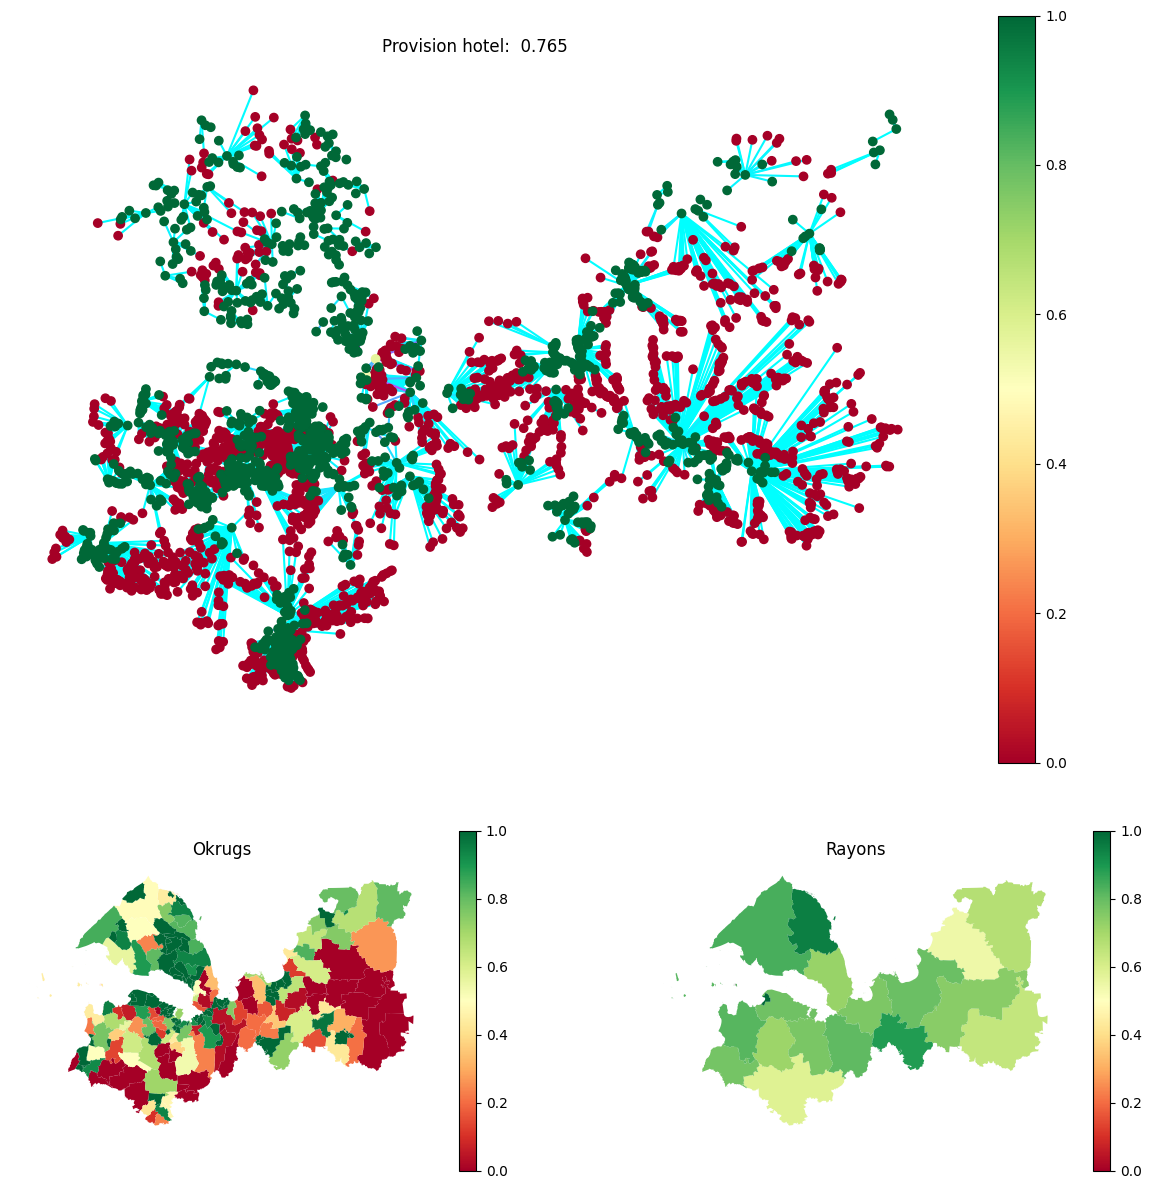

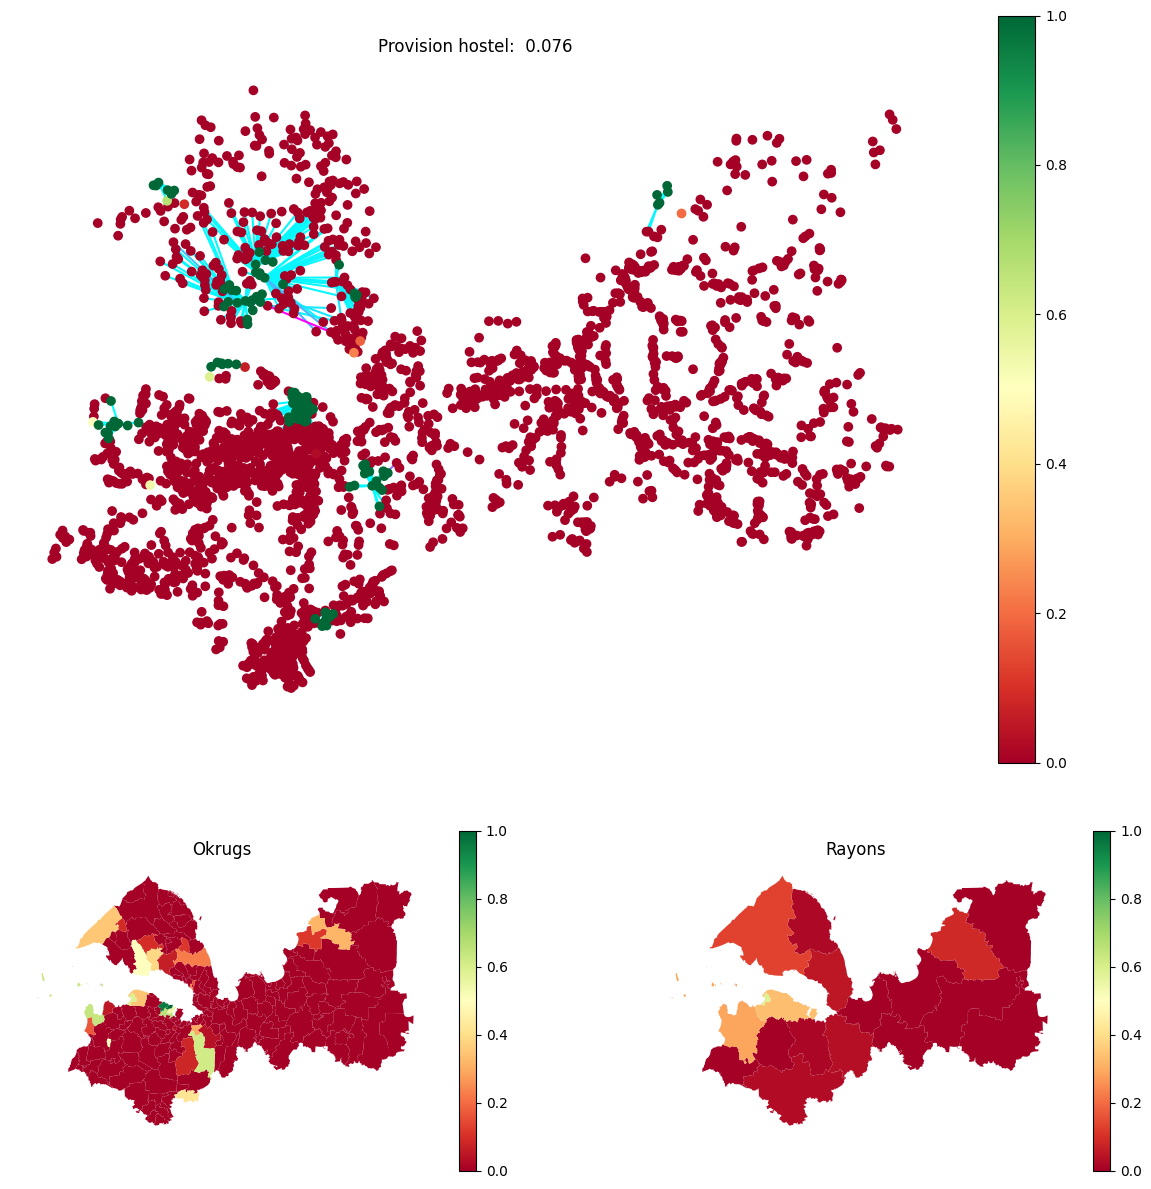

In [7]:
for service_type_name, res_dict in prov_dict.items():
  prov.plot(service_type_name, res_dict[0], res_dict[1]) 

In [17]:
prov_dict['school'][0]

name                          okrug_name  \
id                                                          
0              Болото          Борское сельское поселение   
1      Большой Остров          Борское сельское поселение   
2                 Бор          Борское сельское поселение   
3           Бороватое          Борское сельское поселение   
4              Бочево          Борское сельское поселение   
...               ...                                 ...   
2926     Апраксин Бор  Трубникоборское сельское поселение   
2927    Александровка  Трубникоборское сельское поселение   
2928    Большая Горка  Трубникоборское сельское поселение   
2929         Дроздово  Трубникоборское сельское поселение   
2930  Большая Кунесть  Трубникоборское сельское поселение   

                              rayon_name                        geometry  \
id                                                                         
0     Бокситогорский муниципальный район  POINT (543142.339 6580637.744)   
1     Бокситогорский муниципальный район  POINT (544532.929 6593228.214)   
2     Бокситогорский муниципальный район  POINT (544895.402 6593052.876)   
3     Бокситогорский муниципальный район  POINT (543993.111 6589582.121)   
4     Бокситогорский муниципальный район  POINT (538540.110 6576793.684)   
...                                  ...                             ...   
2926     Тоснненский муниципальный район  POINT (399059.742 6560341.471)   
2927     Тоснненский муниципальный район  POINT (403967.171 6562087.081)   
2928     Тоснненский муниципальный район  POINT (413116.740 6573793.279)   
2929     Тоснненский муниципальный район  POINT (412458.032 6574811.307)   
2930     Тоснненский муниципальный район  POINT (412158.909 6574630.200)   

      demand  capacity  capacity_left  demand_left  demand_within  \
id                                                                  
0       14.0       0.0            0.0          0.0            0.0   
1       14.0       0.0            0.0          0.0            0.0   
2       14.0     250.0            0.0          0.0            0.0   
3       14.0       0.0            0.0          0.0            0.0   
4       13.0       0.0            0.0          0.0            0.0   
...      ...       ...            ...          ...            ...   
2926    12.0       0.0            0.0          0.0            0.0   
2927    12.0       0.0            0.0          0.0            0.0   
2928    12.0       0.0            0.0          0.0            0.0   
2929    13.0       0.0            0.0          0.0            0.0   
2930    13.0       0.0            0.0          0.0            0.0   

      demand_without  provision  
id                               
0               14.0        0.0  
1               14.0        0.0  
2               14.0        0.0  
3               14.0        0.0  
4               13.0        0.0  
...              ...        ...  
2926            12.0        0.0  
2927            12.0        0.0  
2928            12.0        0.0  
2929            13.0        0.0  
2930            13.0        0.0  

[2931 rows x 11 columns]